Open price correlation: -0.02512038336008146
Close price correlation: 0.013495506386173863
Traditional Method Accuracy for Open Price:  95.5301039118566
Sentimental Method Accuracy for Open Price:  -3.6911612969454444
Hybrid Method Accuracy for Open Price:  95.1022522318402
Traditional Method Accuracy for Close Price:  93.63713343019285
Sentimental Method Accuracy for Close Price:  -1.0568043227243695
Hybrid Method Accuracy for Close price:  96.01977778248424
(46, 1)
(46, 1)


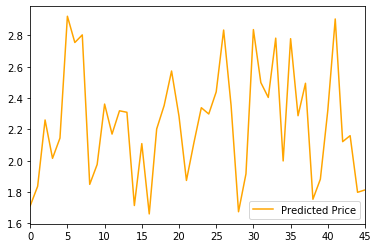

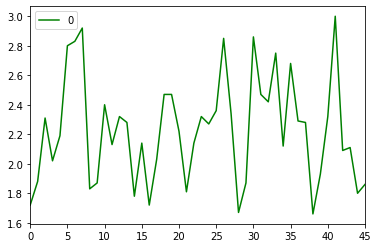

In [7]:
import pandas as pd
import copy
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


result=pd.read_csv('../data/merged_AMD.csv')
print("Open price correlation:", result['Open'].corr(result['open_score']))
print("Close price correlation:", result['Close'].corr(result['close_score']))

df=copy.deepcopy(result)

df = df[['Open',  'High',  'Low',  'Close', 'open_score', 'close_score']]
forecast_col = ['Open',  'High',  'Low',  'Close']
df.fillna(value=-99999, inplace=True)

# forecast_out basically the days ka gap u want to set
forecast_out = 1

df['ForecastOpen'] = df[forecast_col[0]].shift(-forecast_out)
#df['ForecastHigh'] = df[forecast_col[1]].shift(-forecast_out)
#df['ForecastLow'] = df[forecast_col[2]].shift(-forecast_out)
df['ForecastClose'] = df[forecast_col[3]].shift(-forecast_out)

# temporary copy
data=copy.deepcopy(df)

# tradition open price
X = np.array(df.drop(['ForecastOpen', 'ForecastClose','open_score','close_score'], 1))
X = X[:-forecast_out]
# print(X)
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print("Traditional Method Accuracy for Open Price: ", confidence * 100.0)

# sentimental open price
df=copy.deepcopy(data)
X = np.array(df[['open_score']])
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])

# print(X)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)*1
print("Sentimental Method Accuracy for Open Price: ", confidence * 100.0)


# hybrid open price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose'], 1))
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print("Hybrid Method Accuracy for Open Price: ", confidence * 100.0)

#traditional close price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose','open_score','close_score'], 1))
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)


confidence = clf.score(X_test, y_test)
print("Traditional Method Accuracy for Close Price: ", confidence * 100.0)

# sentimental close price
df=copy.deepcopy(data)
X = np.array(df[['close_score']])
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)*1
print("Sentimental Method Accuracy for Close Price: ", confidence * 100.0)

#hybrid close price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose'], 1))
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)


prediction = clf.predict(X_test)


confidence = clf.score(X_test, y_test)
print ('Hybrid Method Accuracy for Close price: ', confidence*100)




result = prediction.ravel() 






predictions_dataframe1 = pd.DataFrame(data=prediction[0:], columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
pd.DataFrame(y_test[0:]).plot.line(color='green')

print(predictions_dataframe1.shape)
print(pd.DataFrame(y_test[0:]).shape)





